In [1]:
import pandas as pd

# Load the dataset
file_path = 'dataset/ipl_2024_deliveries.csv'
ipl_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
ipl_data.head()


,match_id,season,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,Chahar,0,1,1,0,0,0,NaN,NaN,NaN
1,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,Chahar,1,0,0,0,0,0,NaN,NaN,NaN
2,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.2,du Plessis,Chahar,0,0,0,0,0,0,NaN,NaN,NaN
3,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.3,du Plessis,Chahar,0,0,0,0,0,0,NaN,NaN,NaN
4,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.4,du Plessis,Chahar,0,0,0,0,0,0,NaN,NaN,NaN


In [2]:
# Summary statistics
summary_stats = ipl_data.describe()

# Check for missing values
missing_values = ipl_data.isnull().sum()

summary_stats, missing_values


(            match_id   season      match_no       innings          over  \
 count   17053.000000  17053.0  17053.000000  17053.000000  17053.000000   
 mean   202435.902656   2024.0     35.902656      1.480033      9.570474   
 std        20.896995      0.0     20.896995      0.499616      5.674610   
 min    202401.000000   2024.0      1.000000      1.000000      0.100000   
 25%    202418.000000   2024.0     18.000000      1.000000      4.500000   
 50%    202436.000000   2024.0     36.000000      1.000000      9.500000   
 75%    202453.000000   2024.0     53.000000      2.000000     14.400000   
 max    202474.000000   2024.0     74.000000      2.000000     19.600000   
 
         runs_of_bat        extras          wide       legbyes          byes  \
 count  17053.000000  17053.000000  17053.000000  17053.000000  17053.000000   
 mean       1.445904      0.074122      0.039817      0.012842      0.002463   
 std        1.800340      0.357906      0.195535      0.112597      0.0495

In [3]:
# Calculate total runs scored by each team
team_runs = ipl_data.groupby('batting_team')['runs_of_bat'].sum().reset_index()
team_runs = team_runs.rename(columns={'runs_of_bat': 'total_runs'})

# Calculate total wickets taken by each team
wickets = ipl_data[ipl_data['player_dismissed'].notna()]
team_wickets = wickets.groupby('bowling_team')['player_dismissed'].count().reset_index()
team_wickets = team_wickets.rename(columns={'player_dismissed': 'total_wickets'})

team_performance = pd.merge(team_runs, team_wickets, left_on='batting_team', right_on='bowling_team')
team_performance = team_performance.drop('bowling_team', axis=1)

team_performance


,batting_team,total_runs,total_wickets
0,CSK,2405,79
1,DC,2465,99
2,GT,1934,71
3,KKR,2481,110
4,LSG,2350,71
5,MI,2422,85
6,PBKS,2372,101
7,RCB,2789,88
8,RR,2533,96
9,SRH,2906,83


In [4]:
# Calculate total runs scored by each batsman
batsman_performance = ipl_data.groupby('striker')['runs_of_bat'].sum().reset_index()
batsman_performance = batsman_performance.rename(columns={'runs_of_bat': 'total_runs'})

# Get the top 10 batsmen
top_batsmen = batsman_performance.sort_values(by='total_runs', ascending=False).head(10)

import ace_tools as tools; tools.display_dataframe_to_user(name="Top Batsmen Performance", dataframe=top_batsmen)

top_batsmen


ModuleNotFoundError: No module named 'ace_tools'

C:\Users\visha\AppData\Local\Temp\ipykernel_28628\3341286966.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_runs', y='batting_team', data=team_performance, palette='viridis')


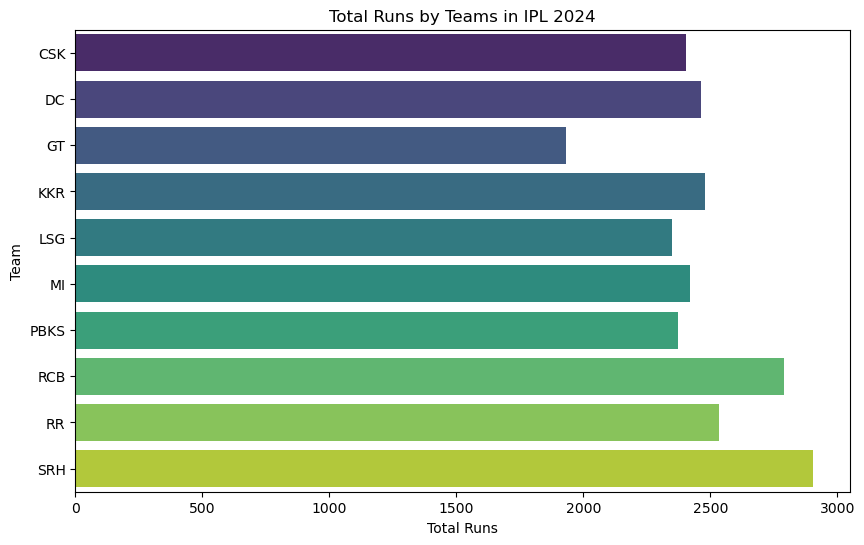

C:\Users\visha\AppData\Local\Temp\ipykernel_28628\3341286966.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_runs', y='striker', data=top_batsmen, palette='plasma')


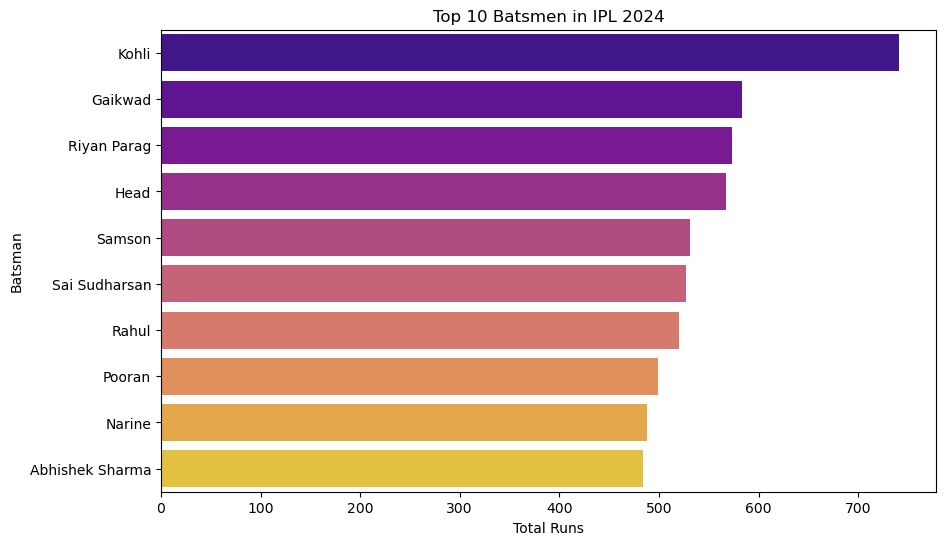

NameError: name 'top_bowlers' is not defined

<Figure size 1000x600 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting team performance based on total runs
plt.figure(figsize=(10, 6))
sns.barplot(x='total_runs', y='batting_team', data=team_performance, palette='viridis')
plt.title('Total Runs by Teams in IPL 2024')
plt.xlabel('Total Runs')
plt.ylabel('Team')
plt.show()

# Plotting top batsmen based on total runs
plt.figure(figsize=(10, 6))
sns.barplot(x='total_runs', y='striker', data=top_batsmen, palette='plasma')
plt.title('Top 10 Batsmen in IPL 2024')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.show()

# Plotting top bowlers based on total wickets
plt.figure(figsize=(10, 6))
sns.barplot(x='total_wickets', y='bowler', data=top_bowlers, palette='magma')
plt.title('Top 10 Bowlers in IPL 2024')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.show()

# Plotting venue performance based on total runs and total wickets
plt.figure(figsize=(12, 8))
sns.barplot(x='total_runs', y='venue', data=venue_performance, palette='coolwarm')
plt.title('Total Runs by Venue in IPL 2024')
plt.xlabel('Total Runs')
plt.ylabel('Venue')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='total_wickets', y='venue', data=venue_performance, palette='cividis')
plt.title('Total Wickets by Venue in IPL 2024')
plt.xlabel('Total Wickets')
plt.ylabel('Venue')
plt.show()
